In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)  
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline 
import seaborn as sns
import plotly.io as pio
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('data/train.csv')
center=pd.read_csv('data/fulfilment_center_info.csv')
meal=pd.read_csv('data/meal_info.csv')

In [87]:
data.shape

(456548, 21)

In [90]:
data.columns

Index(['id', 'week', 'center_id', 'meal_id', 'checkout_price', 'base_price',
       'emailer_for_promotion', 'homepage_featured', 'num_orders', 'city_code',
       'region_code', 'center_type', 'op_area', 'category', 'cuisine',
       'discount amount', 'discount percent', 'discount y/n',
       'compare_week_price', 'compare_week_price y/n', 'city_enc_4'],
      dtype='object')

In [88]:
center.shape

(77, 5)

In [91]:
center.columns

Index(['center_id', 'city_code', 'region_code', 'center_type', 'op_area'], dtype='object')

In [89]:
meal.shape

(51, 3)

In [92]:
meal.columns

Index(['meal_id', 'category', 'cuisine'], dtype='object')

##### Data Pre-Processing

In [4]:
print("The Shape of Demand dataset :",data.shape)
print("The Shape of Fulmilment Center Information dataset :",center.shape)
print("The Shape of Meal information dataset :",meal.shape)

The Shape of Demand dataset : (456548, 9)
The Shape of Fulmilment Center Information dataset : (77, 5)
The Shape of Meal information dataset : (51, 3)


In [5]:
train_cat = data[['center_id','meal_id','emailer_for_promotion','homepage_featured']]
train_num = data[['week','checkout_price']]

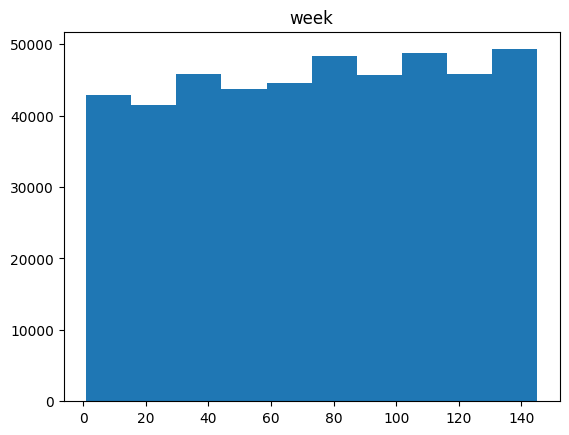

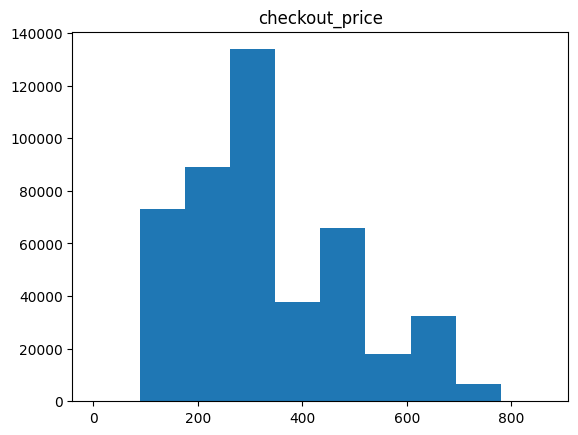

In [6]:
for i in train_num.columns:
    plt.hist(train_num[i])
    plt.title(i)
    plt.show()

In [7]:
data.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,55,1885,136.83,152.29,0,0,177
1,1466964,1,55,1993,136.83,135.83,0,0,270
2,1346989,1,55,2539,134.86,135.86,0,0,189
3,1338232,1,55,2139,339.50,437.53,0,0,54
4,1448490,1,55,2631,243.50,242.50,0,0,40


In [8]:
center.head()

,center_id,city_code,region_code,center_type,op_area
0,11,679,56,TYPE_A,3.7
1,13,590,56,TYPE_B,6.7
2,124,590,56,TYPE_C,4.0
3,66,648,34,TYPE_A,4.1
4,94,632,34,TYPE_C,3.6


In [9]:
meal.head()

,meal_id,category,cuisine
0,1885,Beverages,Thai
1,1993,Beverages,Thai
2,2539,Beverages,Thai
3,1248,Beverages,Indian
4,2631,Beverages,Indian


In [10]:
data=data.merge(center,on='center_id',how='left')

In [11]:
data=data.merge(meal,on='meal_id',how='left')

In [12]:
data.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine
0,1379560,1,55,1885,136.83,152.29,0,0,177,647,56,TYPE_C,2.0,Beverages,Thai
1,1466964,1,55,1993,136.83,135.83,0,0,270,647,56,TYPE_C,2.0,Beverages,Thai
2,1346989,1,55,2539,134.86,135.86,0,0,189,647,56,TYPE_C,2.0,Beverages,Thai
3,1338232,1,55,2139,339.50,437.53,0,0,54,647,56,TYPE_C,2.0,Beverages,Indian
4,1448490,1,55,2631,243.50,242.50,0,0,40,647,56,TYPE_C,2.0,Beverages,Indian


In [13]:
data.isnull().sum()

id                       0
week                     0
center_id                0
meal_id                  0
checkout_price           0
base_price               0
emailer_for_promotion    0
homepage_featured        0
num_orders               0
city_code                0
region_code              0
center_type              0
op_area                  0
category                 0
cuisine                  0
dtype: int64

##### Deriving New Features

In [14]:
#Discount Amount
data['discount amount']=data['base_price']-data['checkout_price']

In [15]:
#Discount Percent
data['discount percent'] = ((data['base_price']-data['checkout_price'])/data['base_price'])*100

In [16]:
#Discount Y/N
data['discount y/n'] = [1 if x>0 else 0 for x in (data['base_price']-data['checkout_price'])]

In [17]:
data=data.sort_values(['center_id', 'meal_id', 'week']).reset_index()

In [18]:
#Compare Week Price
data['compare_week_price'] = data['checkout_price'] - data['checkout_price'].shift(1) 

In [19]:
data['compare_week_price'][data['week']==1]=0

In [20]:
data=data.sort_values(by='index').reset_index().drop(['level_0','index'],axis=1)

In [21]:
# Compare Week Price Y/N
data['compare_week_price y/n'] = [1 if x>0 else 0 for x in data['compare_week_price']]

In [22]:
data.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine,discount amount,discount percent,discount y/n,compare_week_price,compare_week_price y/n
0,1379560,1,55,1885,136.83,152.29,0,0,177,647,56,TYPE_C,2.0,Beverages,Thai,15.46,10.151684,1,0.0,0
1,1466964,1,55,1993,136.83,135.83,0,0,270,647,56,TYPE_C,2.0,Beverages,Thai,-1.00,-0.736214,0,0.0,0
2,1346989,1,55,2539,134.86,135.86,0,0,189,647,56,TYPE_C,2.0,Beverages,Thai,1.00,0.736052,1,0.0,0
3,1338232,1,55,2139,339.50,437.53,0,0,54,647,56,TYPE_C,2.0,Beverages,Indian,98.03,22.405321,1,0.0,0
4,1448490,1,55,2631,243.50,242.50,0,0,40,647,56,TYPE_C,2.0,Beverages,Indian,-1.00,-0.412371,0,0.0,0


In [23]:
data.isnull().sum()

id                        0
week                      0
center_id                 0
meal_id                   0
checkout_price            0
base_price                0
emailer_for_promotion     0
homepage_featured         0
num_orders                0
city_code                 0
region_code               0
center_type               0
op_area                   0
category                  0
cuisine                   0
discount amount           0
discount percent          0
discount y/n              0
compare_week_price        0
compare_week_price y/n    0
dtype: int64

##### Train Test Split

In [24]:
train=data[data['week'].isin(range(1,146))]
test=data[data['week'].isin(range(146,156))]

In [25]:
print("The Shape of Train dataset :",train.shape)
print("The Shape of Test dataset :",test.shape)

The Shape of Train dataset : (456548, 20)
The Shape of Test dataset : (0, 20)


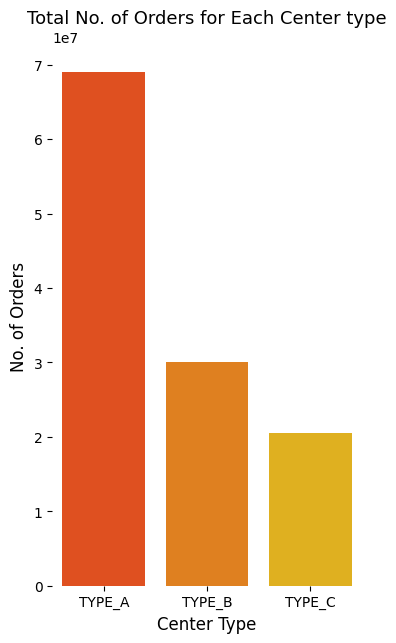

In [26]:
fig=plt.figure(figsize=(4,7))
plt.title('Total No. of Orders for Each Center type',fontdict={'fontsize':13})
sns.barplot(y='num_orders', x='center_type', data=train.groupby('center_type').sum()['num_orders'].reset_index(),palette='autumn');
plt.ylabel('No. of Orders',fontdict={'fontsize':12})
plt.xlabel('Center Type',fontdict={'fontsize':12})
sns.despine(bottom = True, left = True);


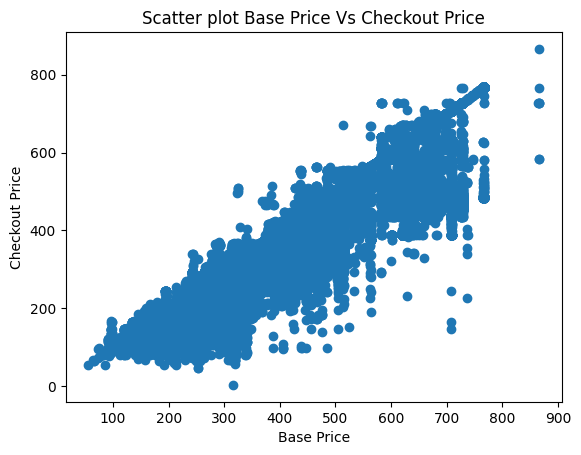

In [27]:
##EDA
import matplotlib.pyplot as plt
plt.scatter(data['base_price'], data['checkout_price'])
plt.title('Scatter plot Base Price Vs Checkout Price')
plt.xlabel('Base Price')
plt.ylabel('Checkout Price')
plt.show()

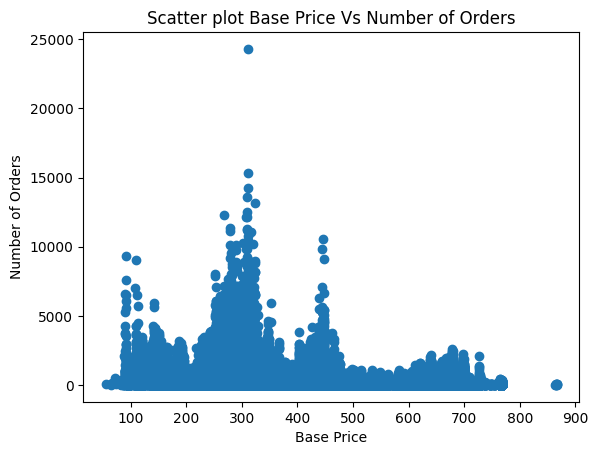

In [28]:
plt.scatter(data['base_price'], data['num_orders'])
plt.title('Scatter plot Base Price Vs Number of Orders')
plt.xlabel('Base Price')
plt.ylabel('Number of Orders')
plt.show()

<Axes: xlabel='base_price', ylabel='Density'>

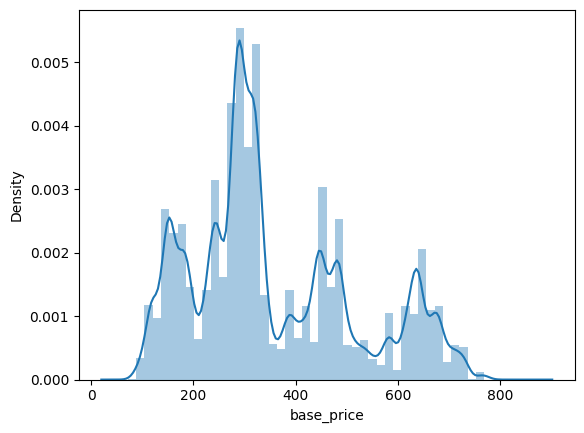

In [29]:
##Distribution Plot
import seaborn as sns
sns.distplot(data['base_price'])

<Axes: xlabel='checkout_price', ylabel='Density'>

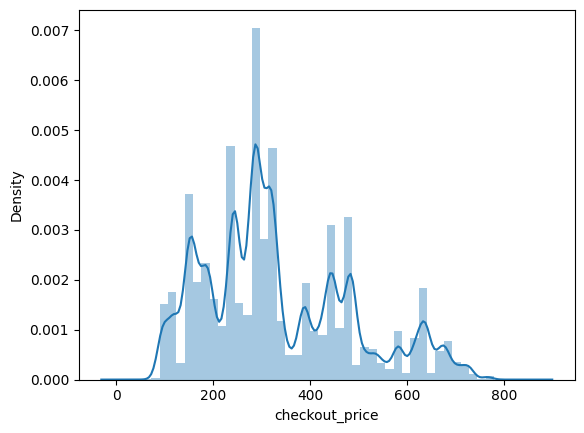

In [30]:
sns.distplot(data['checkout_price'])

Type_A Centers have the highest number of Orders placed and Type_C has the least.

In [31]:
train['center_id'].nunique()

77

The are are 77 Fullfilment Centers in total.

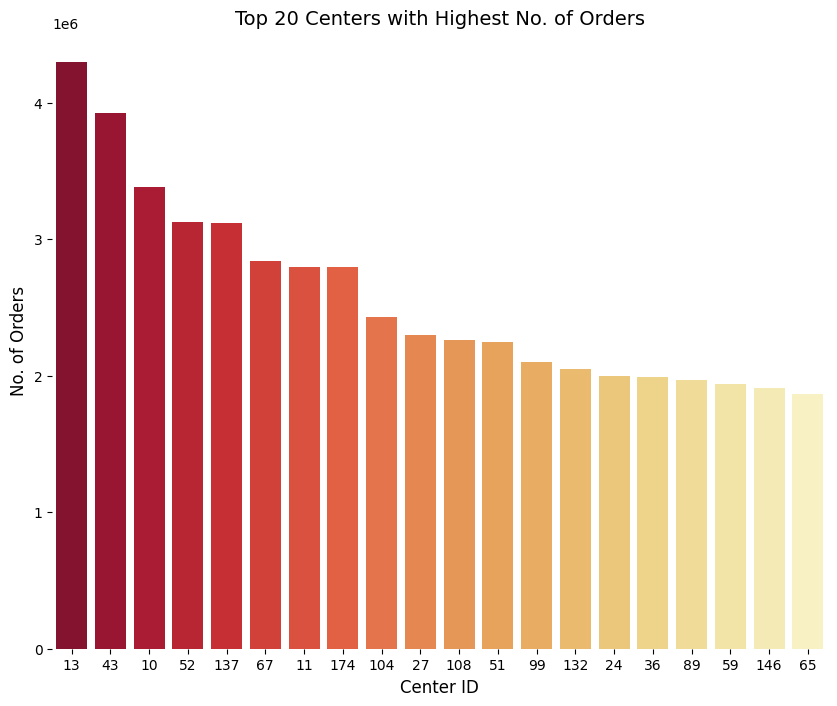

In [32]:
fig=plt.figure(figsize=(10,8))
plt.title('Top 20 Centers with Highest No. of Orders',fontdict={'fontsize':14})
sns.barplot(y='num_orders', x='center_id', data=train.groupby(['center_id','center_type']).num_orders.sum().sort_values(ascending=False).reset_index().head(20),palette='YlOrRd_r',order=list(train.groupby(['center_id','center_type']).num_orders.sum().sort_values(ascending=False).reset_index().head(20)['center_id']));
plt.ylabel('No. of Orders',fontdict={'fontsize':12})
plt.xlabel('Center ID',fontdict={'fontsize':12})
sns.despine(bottom = True, left = True);


Initially, when we checked, which Center Type has the highest number of Orders, We found that Center Type_A has the highest number of orders, but now when we check individually, we could see that Center 13 of Type_B has the highest number of Orders. Let’s analyze the reason behind that.

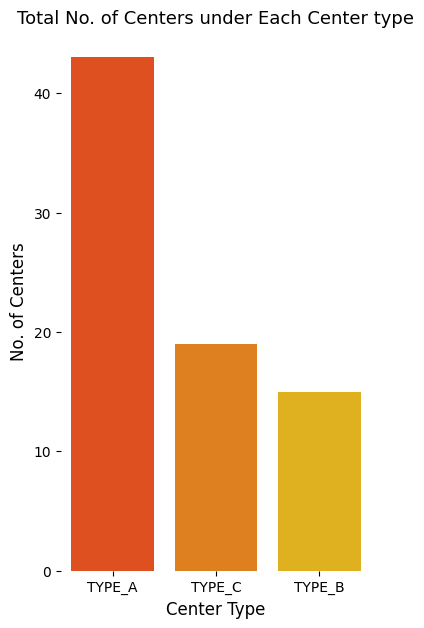

In [33]:
fig=plt.figure(figsize=(4,7))
plt.title('Total No. of Centers under Each Center type',fontdict={'fontsize':13})
sns.barplot(y=train.groupby(['center_id','center_type']).num_orders.sum().reset_index()['center_type'].value_counts(), x=train.groupby(['center_id','center_type']).num_orders.sum().reset_index()['center_type'].value_counts().index,palette='autumn');
plt.ylabel('No. of Centers',fontdict={'fontsize':12})
plt.xlabel('Center Type',fontdict={'fontsize':12})
sns.despine(bottom = True, left = True);

Type_A has the most number of orders because, Type_A has the most number of Centers - 43 Centers.

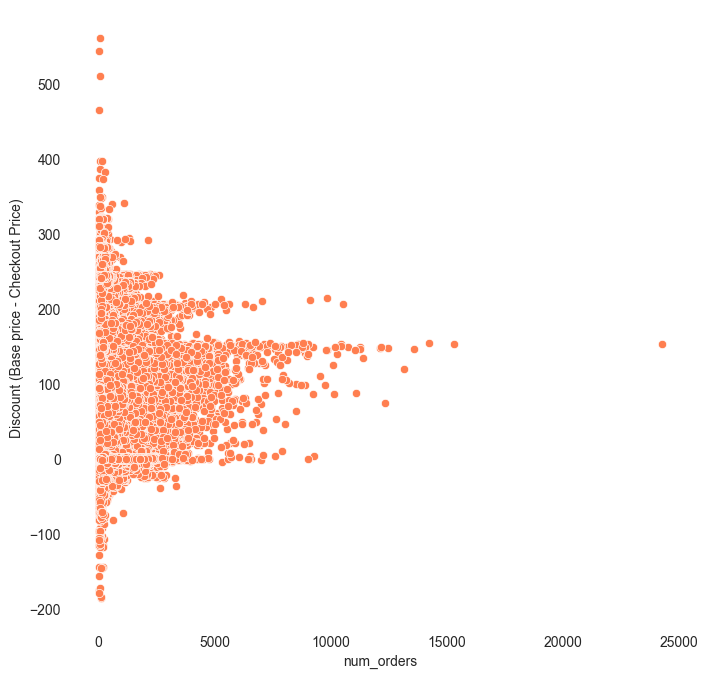

In [34]:
sns.set_style("white")
plt.figure(figsize=(8,8))
sns.scatterplot(y=train['base_price']-train['checkout_price'],x=train['num_orders'],color='coral')
plt.ylabel('Discount (Base price - Checkout Price)')
sns.despine(bottom = True, left = True)

We created a new feature: Discount which is the difference of base price and checkout price and tried to find out if there is any relationship between the discount and the number of orders. But surprisingly there are no good correlation between the discount and the number of orders.

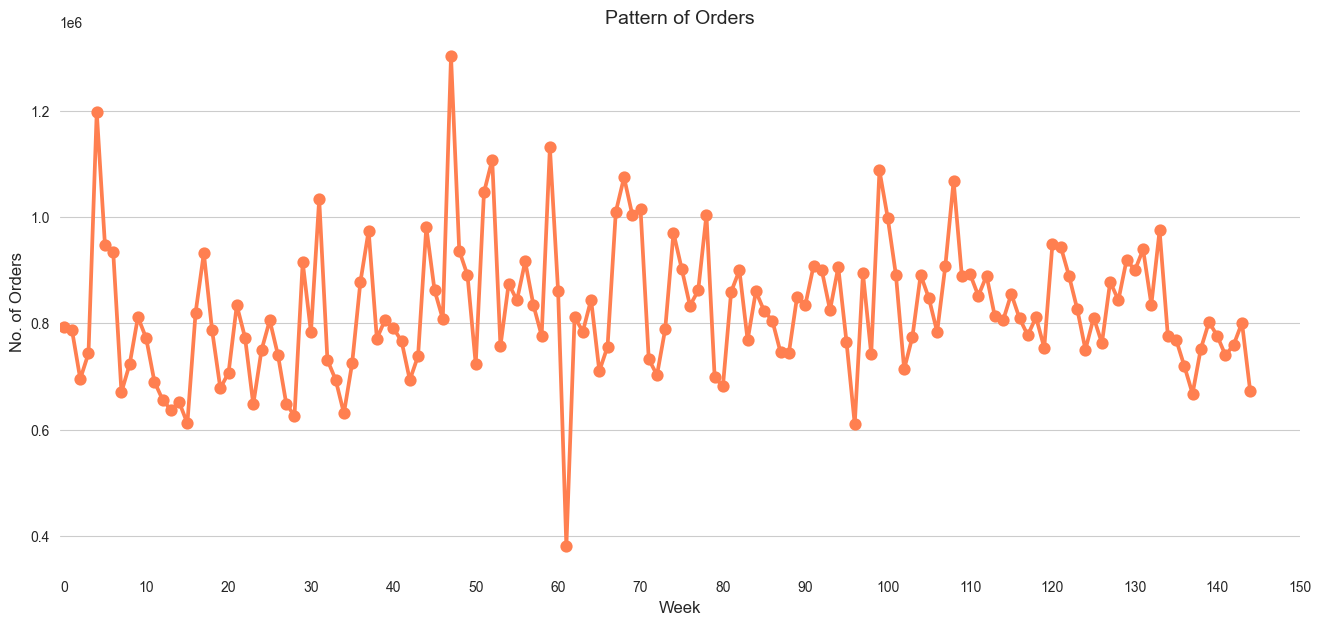

In [35]:
fig=plt.figure(figsize=(16,7))
sns.set_style("whitegrid")
plt.title('Pattern of Orders',fontdict={'fontsize':14})

sns.pointplot(x=train.groupby('week').sum().reset_index()['week'],y=train.groupby('week').sum().reset_index()['num_orders'],color='coral')
plt.xticks(range(0, 160, 10), list(np.arange(0,160,10)))
plt.ylabel('No. of Orders',fontdict={'fontsize':12})
plt.xlabel('Week',fontdict={'fontsize':12})
sns.despine(bottom = True, left = True);

When we analysed the trend of order placed over the weeks, we could see that the highest number of orders were received in week 48 and the lowest in week 62.

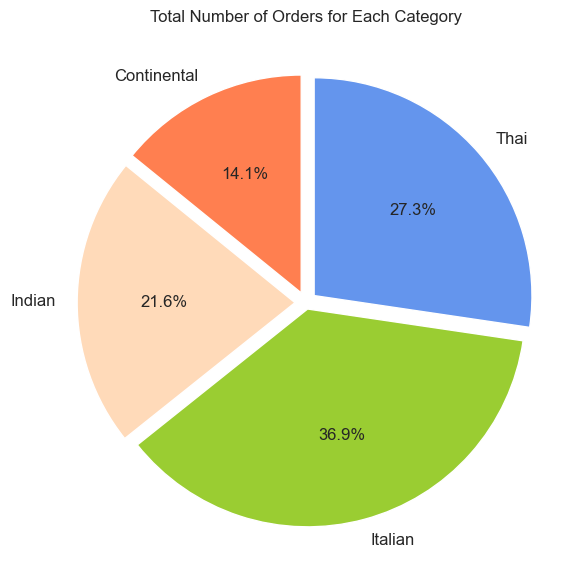

In [36]:
plt.figure(figsize=(6,6))
colors = ['coral','#FFDAB9','yellowgreen','#6495ED']
plt.pie(train.groupby(['cuisine']).num_orders.sum(),
    labels=train.groupby(['cuisine']).num_orders.sum().index,
    shadow=False,
    colors=colors,
    explode=(0.05, 0.05, 0.03,0.05),
    startangle=90, 
    autopct='%1.1f%%',pctdistance=0.6,
    textprops={'fontsize': 12})
plt.title('Total Number of Orders for Each Category')
plt.tight_layout()
plt.show()

Italian Cuisine has the highest number of orders with Continental cuisine being the least.

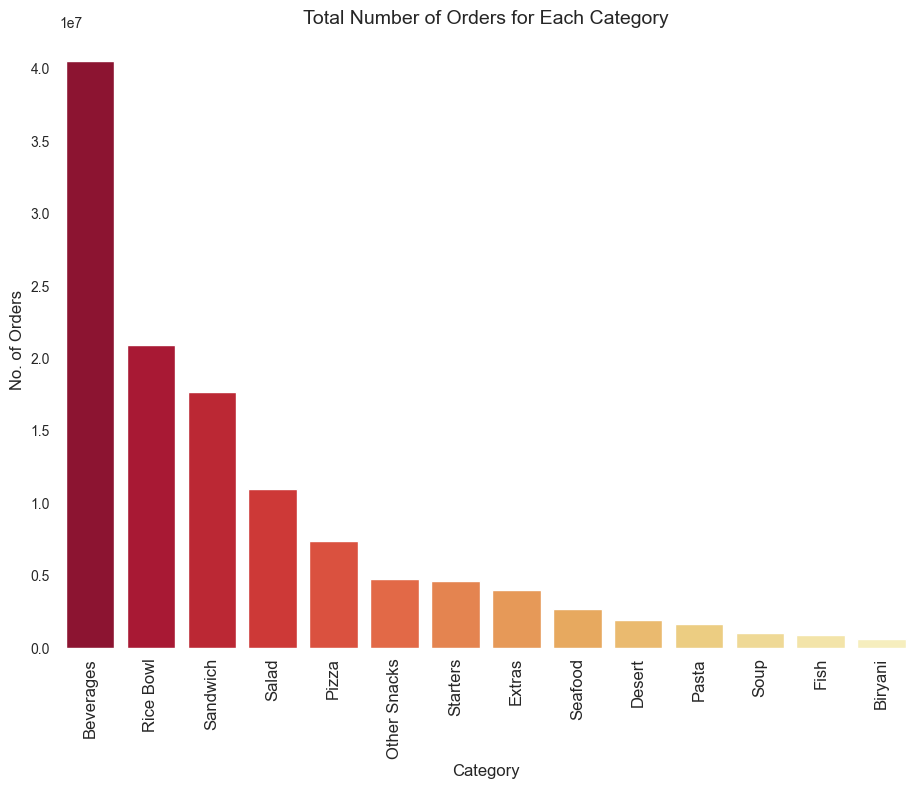

In [37]:
fig=plt.figure(figsize=(11,8))
sns.set_style("white")

plt.xticks(rotation=90,fontsize=12)
plt.title('Total Number of Orders for Each Category',fontdict={'fontsize':14})
sns.barplot(y='num_orders', x='category', data=train.groupby('category').num_orders.sum().sort_values(ascending=False).reset_index(),palette='YlOrRd_r');
plt.ylabel('No. of Orders',fontdict={'fontsize':12})
plt.xlabel('Category',fontdict={'fontsize':12})
sns.despine(bottom = True, left = True);


We could see that Beverages are the food category which has the higest number of orders and Biriyani is the food category with least number of orders.

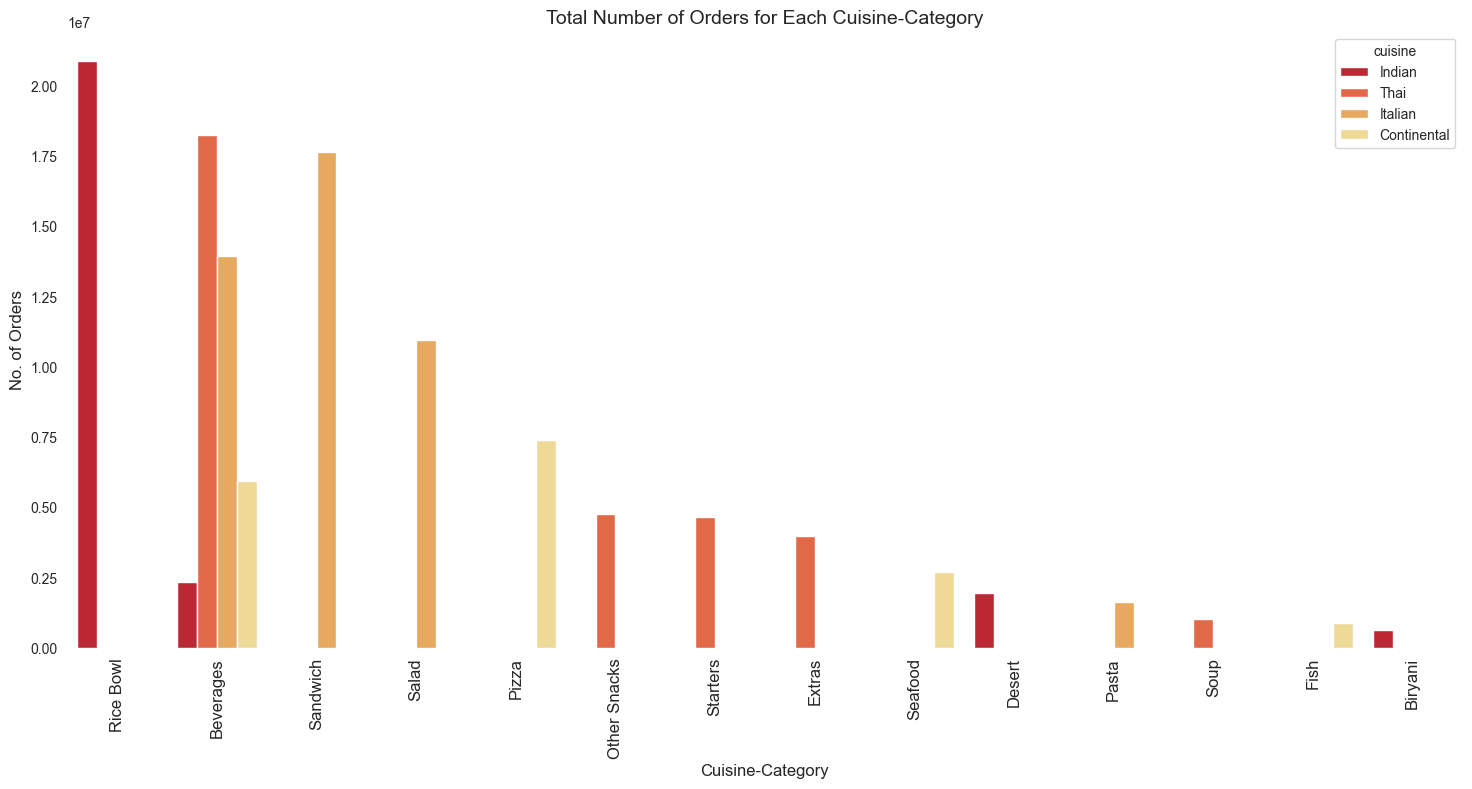

In [38]:
fig=plt.figure(figsize=(18,8))
sns.set_style("white")
plt.xticks(rotation=90,fontsize=12)
plt.title('Total Number of Orders for Each Cuisine-Category',fontdict={'fontsize':14})

sns.barplot(x='category',y='num_orders',data=train.groupby(['cuisine','category']).sum().sort_values(by='num_orders', ascending=False).reset_index(),hue='cuisine',palette='YlOrRd_r')

plt.ylabel('No. of Orders',fontdict={'fontsize':12})
plt.xlabel('Cuisine-Category',fontdict={'fontsize':12})
sns.despine(bottom = True, left = True);

Similary when we checked which specific cuisne-food category has the highest number of orders, we could see that Indian-Rice Bowl has the highest number of orders and Indian-Biriyani has the least.

In [39]:
list(data.groupby('region_code').num_orders.sum().sort_values(ascending=False).reset_index().values[:,0])

[56, 34, 77, 85, 71, 23, 93, 35]

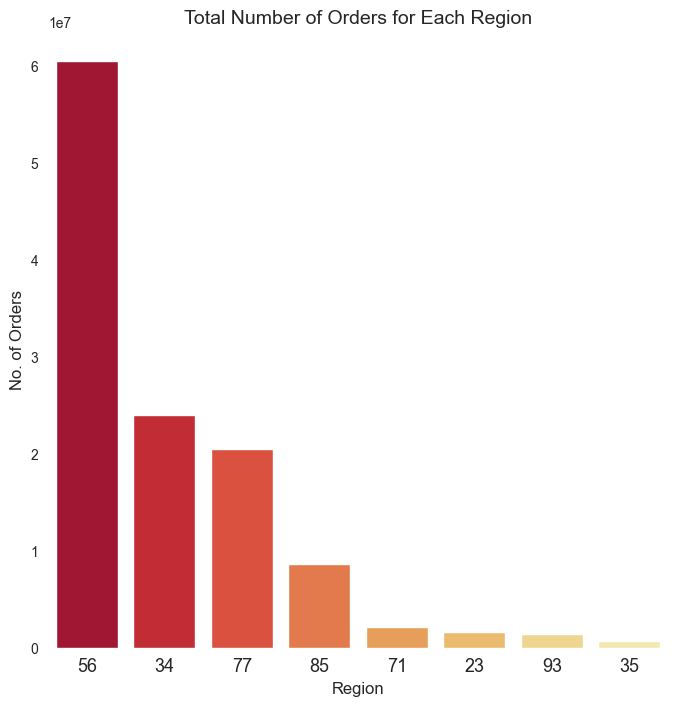

In [40]:
fig=plt.figure(figsize=(8,8))
sns.set_style("white")
plt.xticks(fontsize=13)
plt.title('Total Number of Orders for Each Region',fontdict={'fontsize':14})
sns.barplot(y='num_orders', x='region_code', data=data.groupby('region_code').num_orders.sum().sort_values(ascending=False).reset_index(),palette='YlOrRd_r',order=list(data.groupby('region_code').num_orders.sum().sort_values(ascending=False).reset_index().values[:,0]));
plt.ylabel('No. of Orders',fontdict={'fontsize':12})
plt.xlabel('Region',fontdict={'fontsize':12})
plt.xticks()
sns.despine(bottom = True, left = True);


Also when we checked the number of orders with respect to Region, we could see that Region - 56 has the highest number of orders - 60.5M orders which is almost 35M orders higher than the Region with second highest number of orders - Region 34 - 24M orders. 

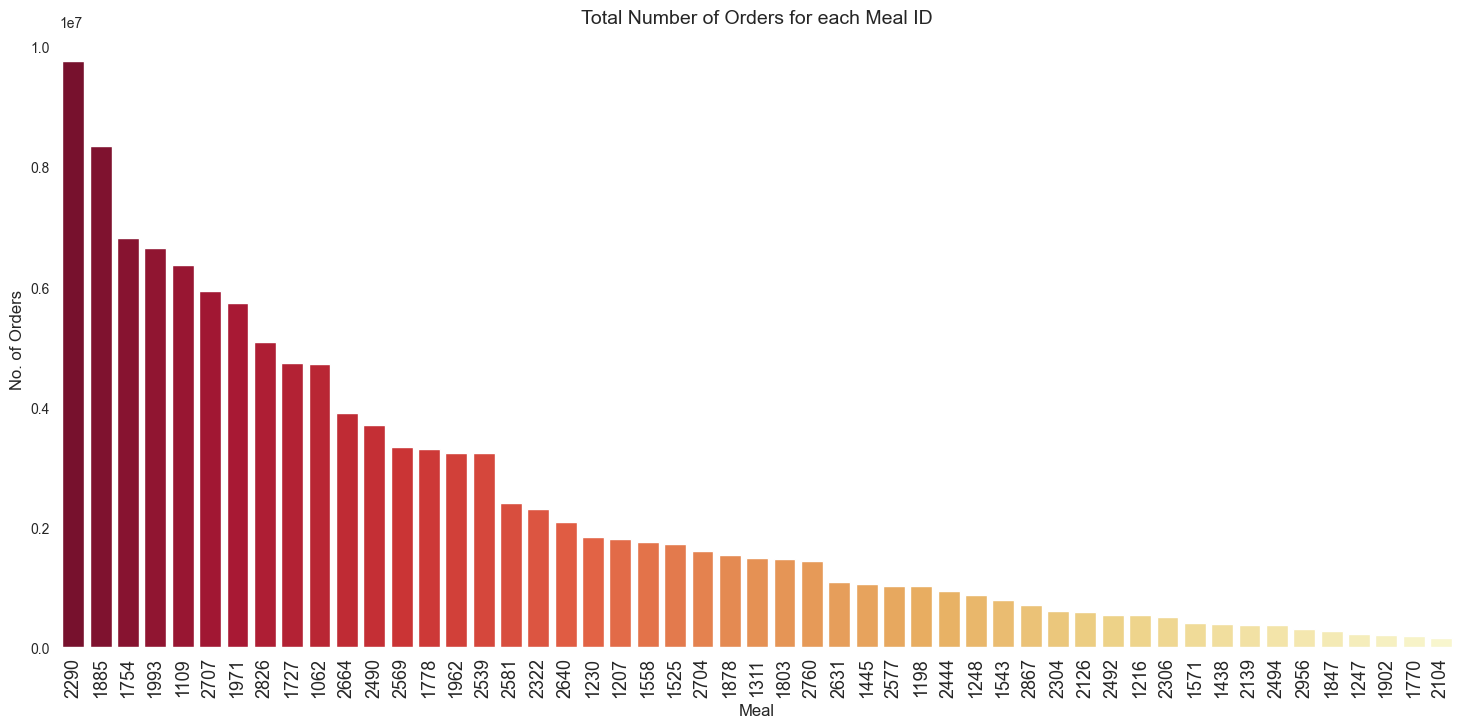

In [41]:
fig=plt.figure(figsize=(18,8))
sns.set_style("white")
plt.xticks(rotation=90,fontsize=13)
plt.title('Total Number of Orders for each Meal ID',fontdict={'fontsize':14})
sns.barplot(y='num_orders', x='meal_id', data=data.groupby('meal_id').num_orders.sum().sort_values(ascending=False).reset_index(),palette='YlOrRd_r',order=list(data.groupby('meal_id').num_orders.sum().sort_values(ascending=False).reset_index()['meal_id'].values));
plt.ylabel('No. of Orders',fontdict={'fontsize':12})
plt.xlabel('Meal',fontdict={'fontsize':12})
sns.despine(bottom = True, left = True);


Meal ID 2290 has the higest number of Orders. There is not much significant differences between number of orders for different Meal IDs.

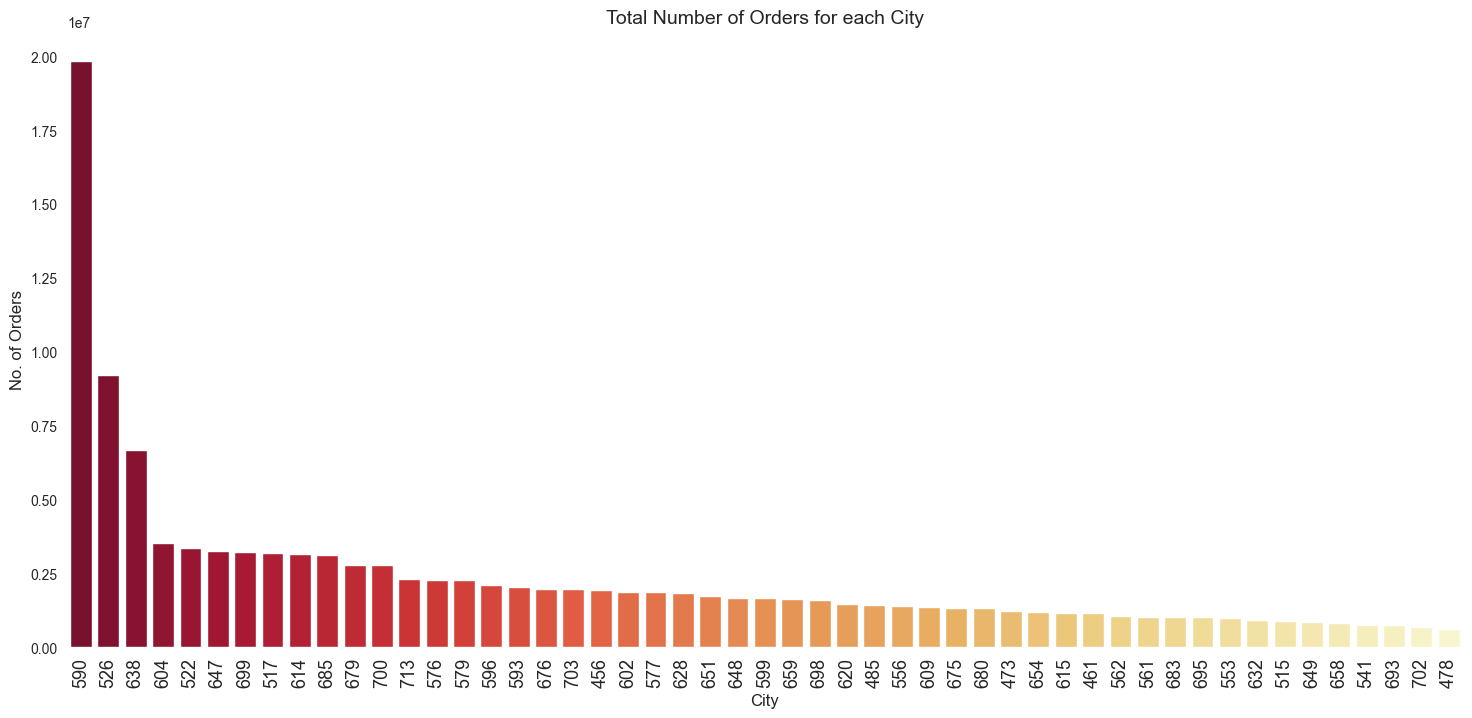

In [42]:
fig=plt.figure(figsize=(18,8))
sns.set_style("white")
plt.xticks(rotation=90,fontsize=13)
plt.title('Total Number of Orders for each City',fontdict={'fontsize':14})
sns.barplot(y='num_orders', x='city_code', data=train.groupby('city_code').num_orders.sum().sort_values(ascending=False).reset_index(),palette='YlOrRd_r',order=list(train.groupby('city_code').num_orders.sum().sort_values(ascending=False).reset_index()['city_code'].values));
plt.ylabel('No. of Orders',fontdict={'fontsize':12})
plt.xlabel('City',fontdict={'fontsize':12})
sns.despine(bottom = True, left = True);


Also when we checked the number of orders with respect to City, we could see that City - 590 has the highest number of orders - 18.5M orders which is almost 10M orders higher than the City with second highest number of orders - City 526 - 8.6M orders.

##### Encoding City 

As per our observation from our barchart of the City against the number of orders. There the high significant difference between the Top 3 cities which has the highest number of orders. Therefore, in our first approach we will encode the City with Highest No. of Orders as CH1, City with 2nd Highest No. of Orders as CH2 and City with 3rd Highest No. of Orders as CH3 and rest all of the cities which does not have much significant differences between the number of orders as CH4.

In [43]:
city4={590:'CH1', 526:'CH2', 638:'CH3'}
data['city_enc_4']=data['city_code'].map(city4)
data['city_enc_4']=data['city_enc_4'].fillna('CH4')

In [44]:
data['city_enc_4'].value_counts()

city_enc_4
CH4    338230
CH1     54746
CH2     43525
CH3     20047
Name: count, dtype: int64

In [45]:
data.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine,discount amount,discount percent,discount y/n,compare_week_price,compare_week_price y/n,city_enc_4
0,1379560,1,55,1885,136.83,152.29,0,0,177,647,56,TYPE_C,2.0,Beverages,Thai,15.46,10.151684,1,0.0,0,CH4
1,1466964,1,55,1993,136.83,135.83,0,0,270,647,56,TYPE_C,2.0,Beverages,Thai,-1.00,-0.736214,0,0.0,0,CH4
2,1346989,1,55,2539,134.86,135.86,0,0,189,647,56,TYPE_C,2.0,Beverages,Thai,1.00,0.736052,1,0.0,0,CH4
3,1338232,1,55,2139,339.50,437.53,0,0,54,647,56,TYPE_C,2.0,Beverages,Indian,98.03,22.405321,1,0.0,0,CH4
4,1448490,1,55,2631,243.50,242.50,0,0,40,647,56,TYPE_C,2.0,Beverages,Indian,-1.00,-0.412371,0,0.0,0,CH4


In [46]:
data.isnull().sum()

id                        0
week                      0
center_id                 0
meal_id                   0
checkout_price            0
base_price                0
emailer_for_promotion     0
homepage_featured         0
num_orders                0
city_code                 0
region_code               0
center_type               0
op_area                   0
category                  0
cuisine                   0
discount amount           0
discount percent          0
discount y/n              0
compare_week_price        0
compare_week_price y/n    0
city_enc_4                0
dtype: int64

##### Copying to New DataFrame

In [47]:
datax=data.copy()
datax.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine,discount amount,discount percent,discount y/n,compare_week_price,compare_week_price y/n,city_enc_4
0,1379560,1,55,1885,136.83,152.29,0,0,177,647,56,TYPE_C,2.0,Beverages,Thai,15.46,10.151684,1,0.0,0,CH4
1,1466964,1,55,1993,136.83,135.83,0,0,270,647,56,TYPE_C,2.0,Beverages,Thai,-1.00,-0.736214,0,0.0,0,CH4
2,1346989,1,55,2539,134.86,135.86,0,0,189,647,56,TYPE_C,2.0,Beverages,Thai,1.00,0.736052,1,0.0,0,CH4
3,1338232,1,55,2139,339.50,437.53,0,0,54,647,56,TYPE_C,2.0,Beverages,Indian,98.03,22.405321,1,0.0,0,CH4
4,1448490,1,55,2631,243.50,242.50,0,0,40,647,56,TYPE_C,2.0,Beverages,Indian,-1.00,-0.412371,0,0.0,0,CH4


##### Enoding all the Categorical Features

In [48]:
datax['center_id']=datax['center_id'].astype('object')
datax['meal_id']=datax['meal_id'].astype('object')
datax['region_code']=datax['region_code'].astype('object')

In [49]:
obj=datax[['center_id','meal_id','region_code','center_type','category','cuisine','city_enc_4']]
num=datax.drop(['center_id','meal_id','region_code','center_type','category','cuisine','city_enc_4'],axis=1)

In [50]:
encode1=pd.get_dummies(obj,drop_first = True)

In [51]:
datax=pd.concat([num,encode1],axis=1)

In [52]:
datax.head()

,id,week,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,op_area,discount amount,discount percent,discount y/n,compare_week_price,compare_week_price y/n,center_id_11,center_id_13,center_id_14,center_id_17,center_id_20,center_id_23,center_id_24,center_id_26,center_id_27,center_id_29,center_id_30,center_id_32,center_id_34,center_id_36,center_id_39,center_id_41,center_id_42,center_id_43,center_id_50,center_id_51,center_id_52,center_id_53,center_id_55,center_id_57,center_id_58,center_id_59,center_id_61,center_id_64,center_id_65,center_id_66,center_id_67,center_id_68,center_id_72,center_id_73,center_id_74,center_id_75,center_id_76,center_id_77,center_id_80,center_id_81,center_id_83,center_id_86,center_id_88,center_id_89,center_id_91,center_id_92,center_id_93,center_id_94,center_id_97,center_id_99,center_id_101,center_id_102,center_id_104,center_id_106,center_id_108,center_id_109,center_id_110,center_id_113,center_id_124,center_id_126,center_id_129,center_id_132,center_id_137,center_id_139,center_id_143,center_id_145,center_id_146,center_id_149,center_id_152,center_id_153,center_id_157,center_id_161,center_id_162,center_id_174,center_id_177,center_id_186,meal_id_1109,meal_id_1198,meal_id_1207,meal_id_1216,meal_id_1230,meal_id_1247,meal_id_1248,meal_id_1311,meal_id_1438,meal_id_1445,meal_id_1525,meal_id_1543,meal_id_1558,meal_id_1571,meal_id_1727,meal_id_1754,meal_id_1770,meal_id_1778,meal_id_1803,meal_id_1847,meal_id_1878,meal_id_1885,meal_id_1902,meal_id_1962,meal_id_1971,meal_id_1993,meal_id_2104,meal_id_2126,meal_id_2139,meal_id_2290,meal_id_2304,meal_id_2306,meal_id_2322,meal_id_2444,meal_id_2490,meal_id_2492,meal_id_2494,meal_id_2539,meal_id_2569,meal_id_2577,meal_id_2581,meal_id_2631,meal_id_2640,meal_id_2664,meal_id_2704,meal_id_2707,meal_id_2760,meal_id_2826,meal_id_2867,meal_id_2956,region_code_34,region_code_35,region_code_56,region_code_71,region_code_77,region_code_85,region_code_93,center_type_TYPE_B,center_type_TYPE_C,category_Biryani,category_Desert,category_Extras,category_Fish,category_Other Snacks,category_Pasta,category_Pizza,category_Rice Bowl,category_Salad,category_Sandwich,category_Seafood,category_Soup,category_Starters,cuisine_Indian,cuisine_Italian,cuisine_Thai,city_enc_4_CH2,city_enc_4_CH3,city_enc_4_CH4
0,1379560,1,136.83,152.29,0,0,177,647,2.0,15.46,10.151684,1,0.0,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True
1,1466964,1,136.83,135.83,0,0,270,647,2.0,-1.00,-0.736214,0,0.0,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,

##### Base Model

Building base model by splitting the last 10 week of the train dataset as test.

In [53]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [54]:
train=datax[datax['week'].isin(range(1,136))]
test=datax[datax['week'].isin(range(136,146))]

X_train=train.drop(['id','num_orders','week'],axis=1)
y_train=train['num_orders']

X_test=test.drop(['id','num_orders','week'],axis=1)
y_test=test['num_orders']

reg = LinearRegression()
reg.fit(X_train,y_train)
print('Train Score :',reg.score(X_train,y_train))
print('Test Score :',reg.score(X_test,y_test))

y_pred = reg.predict(X_test)
print('R squared :',(r2_score(y_test,y_pred)))
print('RMSE :',np.sqrt(mean_squared_error(y_test,y_pred)))

Train Score : 0.4928488465457015
Test Score : 0.5060117442264341
R squared : 0.5060117442264341
RMSE : 194.40192230328665


##### Linear Model 2 : Applying Standard Scaling & Log Transformation

In [55]:
sc=StandardScaler()

cat=datax.drop(['checkout_price','base_price','discount amount','discount percent','compare_week_price'],axis=1)
num=datax[['checkout_price','base_price','discount amount','discount percent','compare_week_price']]
scal= pd.DataFrame(sc.fit_transform(num),columns=num.columns)
datas=pd.concat([scal,cat],axis=1)

train=datas[datas['week'].isin(range(1,136))]
test=datas[datas['week'].isin(range(136,146))]


X_train=train.drop(['id','num_orders','week'],axis=1)
y_train=np.log(train['num_orders']) #Applying Log Transformation on the Target Feature

X_test=test.drop(['id','num_orders','week'],axis=1)
y_test=np.log(test['num_orders']) #Applying Log Transformation on the Target Feature

reg = LinearRegression()
reg.fit(X_train,y_train)
print('Train Score :',reg.score(X_train,y_train))
print('Test Score :',reg.score(X_test,y_test))

y_pred = reg.predict(X_test)
print('R squared :',(r2_score(y_test,y_pred)))
print('RMSLE :',np.sqrt(mean_squared_error(y_test,y_pred)))

Train Score : 0.7273905048282043
Test Score : 0.7032054523831149
R squared : 0.7032054523831149
RMSLE : 0.6347988001240115


##### Copying to New DataFrame

In [56]:
datay=datas.copy()

In [57]:
datay['Quarter']=(datas['week']/13).astype('int64')

In [58]:
datay['Quarter'] = datay['Quarter'].map({0:'Q1',
                         1:'Q2',
                         2:'Q3',
                         3:'Q4',
                         4:'Q1',
                         5:'Q2',
                         6:'Q3',
                         7:'Q4',
                         8:'Q1',
                         9:'Q2',
                         10:'Q3',
                         11:'Q4'})

In [59]:
datay['Quarter'].value_counts()

Quarter
Q3    124225
Q2    122386
Q1    117671
Q4     92266
Name: count, dtype: int64

In [60]:
datay['Year']=(datas['week']/52).astype('int64')

In [61]:
datay['Year'] = datay['Year'].map({0:'Y1',
                         1:'Y2',
                         2:'Y3'})

In [62]:
objy=datay[['Quarter', 'Year']]
numy=datay.drop(['Quarter', 'Year'],axis=1)

encode1y=pd.get_dummies(objy,drop_first = True)
encode1y.head()

datay=pd.concat([numy,encode1y],axis=1)

In [63]:
datay.head()

,checkout_price,base_price,discount amount,discount percent,compare_week_price,id,week,emailer_for_promotion,homepage_featured,num_orders,city_code,op_area,discount y/n,compare_week_price y/n,center_id_11,center_id_13,center_id_14,center_id_17,center_id_20,center_id_23,center_id_24,center_id_26,center_id_27,center_id_29,center_id_30,center_id_32,center_id_34,center_id_36,center_id_39,center_id_41,center_id_42,center_id_43,center_id_50,center_id_51,center_id_52,center_id_53,center_id_55,center_id_57,center_id_58,center_id_59,center_id_61,center_id_64,center_id_65,center_id_66,center_id_67,center_id_68,center_id_72,center_id_73,center_id_74,center_id_75,center_id_76,center_id_77,center_id_80,center_id_81,center_id_83,center_id_86,center_id_88,center_id_89,center_id_91,center_id_92,center_id_93,center_id_94,center_id_97,center_id_99,center_id_101,center_id_102,center_id_104,center_id_106,center_id_108,center_id_109,center_id_110,center_id_113,center_id_124,center_id_126,center_id_129,center_id_132,center_id_137,center_id_139,center_id_143,center_id_145,center_id_146,center_id_149,center_id_152,center_id_153,center_id_157,center_id_161,center_id_162,center_id_174,center_id_177,center_id_186,meal_id_1109,meal_id_1198,meal_id_1207,meal_id_1216,meal_id_1230,meal_id_1247,meal_id_1248,meal_id_1311,meal_id_1438,meal_id_1445,meal_id_1525,meal_id_1543,meal_id_1558,meal_id_1571,meal_id_1727,meal_id_1754,meal_id_1770,meal_id_1778,meal_id_1803,meal_id_1847,meal_id_1878,meal_id_1885,meal_id_1902,meal_id_1962,meal_id_1971,meal_id_1993,meal_id_2104,meal_id_2126,meal_id_2139,meal_id_2290,meal_id_2304,meal_id_2306,meal_id_2322,meal_id_2444,meal_id_2490,meal_id_2492,meal_id_2494,meal_id_2539,meal_id_2569,meal_id_2577,meal_id_2581,meal_id_2631,meal_id_2640,meal_id_2664,meal_id_2704,meal_id_2707,meal_id_2760,meal_id_2826,meal_id_2867,meal_id_2956,region_code_34,region_code_35,region_code_56,region_code_71,region_code_77,region_code_85,region_code_93,center_type_TYPE_B,center_type_TYPE_C,category_Biryani,category_Desert,category_Extras,category_Fish,category_Other Snacks,category_Pasta,category_Pizza,category_Rice Bowl,category_Salad,category_Sandwich,category_Seafood,category_Soup,category_Starters,cuisine_Indian,cuisine_Italian,cuisine_Thai,city_enc_4_CH2,city_enc_4_CH3,city_enc_4_CH4,Quarter_Q2,Quarter_Q3,Quarter_Q4,Year_Y2,Year_Y3
0,-1.277687,-1.256048,-0.133160,0.390063,-0.002223,1379560,1,0,0,177,647,2.0,1,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False
1,-1.277687,-1.358465,-0.472571,-0.568148,-0.002223,1466964,1,0,0,270,647,2.0,0,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Fal

##### Applying Log Transformation on the Target Feature

In [64]:
datay['num_orders']=np.log1p(datay['num_orders'])

In [65]:
train=datay[datay['week'].isin(range(1,146))]
def outliers_3(col):
    q3=round(train[col].quantile(0.75),6)
    q1=round(train[col].quantile(0.25),6)
    iqr=q3-q1
    lw = q1 - (3*iqr)
    hw = q3 + (3*iqr)  
    uo=train[train[col]>hw].shape[0]
    lo=train[train[col]<lw].shape[0]
    print('Number of Upper Outliers :',uo)
    print('Number of Lower Outliers :',lo)
    print('Percentage of Outliers :',((uo+lo)/train.shape[0])*100)

In [66]:
outliers_3('num_orders')

Number of Upper Outliers : 0
Number of Lower Outliers : 0
Percentage of Outliers : 0.0


In [67]:
datay.head()

,checkout_price,base_price,discount amount,discount percent,compare_week_price,id,week,emailer_for_promotion,homepage_featured,num_orders,city_code,op_area,discount y/n,compare_week_price y/n,center_id_11,center_id_13,center_id_14,center_id_17,center_id_20,center_id_23,center_id_24,center_id_26,center_id_27,center_id_29,center_id_30,center_id_32,center_id_34,center_id_36,center_id_39,center_id_41,center_id_42,center_id_43,center_id_50,center_id_51,center_id_52,center_id_53,center_id_55,center_id_57,center_id_58,center_id_59,center_id_61,center_id_64,center_id_65,center_id_66,center_id_67,center_id_68,center_id_72,center_id_73,center_id_74,center_id_75,center_id_76,center_id_77,center_id_80,center_id_81,center_id_83,center_id_86,center_id_88,center_id_89,center_id_91,center_id_92,center_id_93,center_id_94,center_id_97,center_id_99,center_id_101,center_id_102,center_id_104,center_id_106,center_id_108,center_id_109,center_id_110,center_id_113,center_id_124,center_id_126,center_id_129,center_id_132,center_id_137,center_id_139,center_id_143,center_id_145,center_id_146,center_id_149,center_id_152,center_id_153,center_id_157,center_id_161,center_id_162,center_id_174,center_id_177,center_id_186,meal_id_1109,meal_id_1198,meal_id_1207,meal_id_1216,meal_id_1230,meal_id_1247,meal_id_1248,meal_id_1311,meal_id_1438,meal_id_1445,meal_id_1525,meal_id_1543,meal_id_1558,meal_id_1571,meal_id_1727,meal_id_1754,meal_id_1770,meal_id_1778,meal_id_1803,meal_id_1847,meal_id_1878,meal_id_1885,meal_id_1902,meal_id_1962,meal_id_1971,meal_id_1993,meal_id_2104,meal_id_2126,meal_id_2139,meal_id_2290,meal_id_2304,meal_id_2306,meal_id_2322,meal_id_2444,meal_id_2490,meal_id_2492,meal_id_2494,meal_id_2539,meal_id_2569,meal_id_2577,meal_id_2581,meal_id_2631,meal_id_2640,meal_id_2664,meal_id_2704,meal_id_2707,meal_id_2760,meal_id_2826,meal_id_2867,meal_id_2956,region_code_34,region_code_35,region_code_56,region_code_71,region_code_77,region_code_85,region_code_93,center_type_TYPE_B,center_type_TYPE_C,category_Biryani,category_Desert,category_Extras,category_Fish,category_Other Snacks,category_Pasta,category_Pizza,category_Rice Bowl,category_Salad,category_Sandwich,category_Seafood,category_Soup,category_Starters,cuisine_Indian,cuisine_Italian,cuisine_Thai,city_enc_4_CH2,city_enc_4_CH3,city_enc_4_CH4,Quarter_Q2,Quarter_Q3,Quarter_Q4,Year_Y2,Year_Y3
0,-1.277687,-1.256048,-0.133160,0.390063,-0.002223,1379560,1,0,0,5.181784,647,2.0,1,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False
1,-1.277687,-1.358465,-0.472571,-0.568148,-0.002223,1466964,1,0,0,5.602119,647,2.0,0,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False

In [85]:
train=datay[datay['week'].isin(range(1,136))]
test=datay[datay['week'].isin(range(136,146))]


X_train=train.drop(['id','num_orders','week','discount amount','city_code'],axis=1)
y_train=train['num_orders']

X_test=test.drop(['id','num_orders','week','discount amount','city_code'],axis=1)
y_test=test['num_orders'] 

reg = LinearRegression()
reg.fit(X_train,y_train)
print('Train Score :',reg.score(X_train,y_train))
print('Test Score :',reg.score(X_test,y_test))

y_pred = reg.predict(X_test)
print('R squared :',(r2_score(y_test,y_pred)))
print('RMSLE :',np.sqrt(mean_squared_error(y_test,y_pred)))

rf_mse = mean_squared_error(y_test, y_pred)
rf_mae = mean_absolute_error(y_test, y_pred)
rf_r2 = r2_score(y_test,y_pred)
print("Linear Regression:")
print("  MSE:", rf_mse)
print("  MAE:", rf_mae)
print("  R-squared:", rf_r2)

Train Score : 0.7290325395278617
Test Score : 0.7046369932321923
R squared : 0.7046369932321923
RMSLE : 0.6245236773579096
Linear Regression:
  MSE: 0.3900298235806463
  MAE: 0.4941202047185384
  R-squared: 0.7046369932321923


##### Linear Model doesn't seems to be yielding much better result. Therefore, we are proceeding with advanced models & ensemble techniques.

In [69]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

from sklearn.ensemble import RandomForestRegressor

from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

from xgboost import XGBRegressor
from sklearn.metrics import explained_variance_score

from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

##### XGBOOST

In [70]:
train=datay[datay['week'].isin(range(1,136))]
test=datay[datay['week'].isin(range(136,146))]


X_train=train.drop(['id','num_orders','week','discount amount','city_code'],axis=1)
y_train=train['num_orders']

X_test=test.drop(['id','num_orders','week','discount amount','city_code'],axis=1)
y_test=test['num_orders']

xgb = XGBRegressor(max_depth = 9,
    learning_rate=0.5,
        silent= 1, 
        objective= 'reg:linear',  
        eval_metric= 'rmse',
        seed= 4)

xgb.fit(X_train,y_train)
print('Train Score :',xgb.score(X_train,y_train))
print('Test Score :',xgb.score(X_test,y_test))

predictions = xgb.predict(X_test)
print('Explained Variance :',explained_variance_score(predictions,y_test))
print("RMSLE :",np.sqrt(mean_squared_error(y_test,predictions)))

Train Score : 0.8754649944176036
Test Score : 0.7984089022118943
Explained Variance : 0.760532998707905
RMSLE : 0.5159487124304605


In [84]:
train=datay[datay['week'].isin(range(1,136))]
test=datay[datay['week'].isin(range(136,146))]


X_train=train.drop(['id','num_orders','week','discount amount','city_code','Quarter_Q2','base_price','discount percent'],axis=1)
y_train=train['num_orders']

X_test=test.drop(['id','num_orders','week','discount amount','city_code','Quarter_Q2','base_price','discount percent'],axis=1)
y_test=test['num_orders']

xgb = XGBRegressor(max_depth = 9,
    learning_rate=0.5,
        silent= 1, 
        objective= 'reg:linear',  
        eval_metric= 'rmse',
        seed= 4)

xgb.fit(X_train,y_train)
print('Train Score :',xgb.score(X_train,y_train))
print('Test Score :',xgb.score(X_test,y_test))

predictions = xgb.predict(X_test)
print('Explained Variance :',explained_variance_score(predictions,y_test))
print("RMSLE :",np.sqrt(mean_squared_error(y_test,predictions)))

rf_mse = mean_squared_error(y_test, predictions)
rf_mae = mean_absolute_error(y_test, predictions)
rf_r2 = r2_score(y_test,predictions)
print("XGBoostRegressor:")
print("  MSE:", rf_mse)
print("  MAE:", rf_mae)
print("  R-squared:", rf_r2)

Train Score : 0.8714149123319253
Test Score : 0.802697968670101
Explained Variance : 0.7653996481943298
RMSLE : 0.5104305226243417
XGBoostRegressor:
  MSE: 0.2605393184265587
  MAE: 0.393909727777579
  R-squared: 0.802697968670101


##### LightBoost Regressor

In [72]:
train=datay[datay['week'].isin(range(1,136))]
test=datay[datay['week'].isin(range(136,146))]


X_train=train.drop(['id','num_orders','week','discount amount','city_code'],axis=1)
y_train=train['num_orders']

X_test=test.drop(['id','num_orders','week','discount amount','city_code'],axis=1)
y_test=test['num_orders']

LGB=LGBMRegressor(boosting_type='gbdt',
        max_depth=8,
        learning_rate=0.5,
        n_estimators=100,
        n_jobs=1)

LGB.fit(X_train, y_train)
print(f'R^2 score for train:', {LGB.score(X_train, y_train)})
print(f'R^2 score for validation:', {LGB.score(X_test,y_test)})
LGBpred=LGB.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test,LGBpred))
print("RMSLE :",rmse)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.040995 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1372
[LightGBM] [Info] Number of data points in the train set: 423727, number of used features: 168
[LightGBM] [Info] Start training from score 4.892793
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
R^2 score for train: {0.8340124110385292}
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_lea

In [73]:
train=datay[datay['week'].isin(range(1,136))]
test=datay[datay['week'].isin(range(136,146))]


X_train=train.drop(['id','num_orders','week','discount amount','city_code'],axis=1)
y_train=train['num_orders']

X_test=test.drop(['id','num_orders','week','discount amount','city_code'],axis=1)
y_test=test['num_orders']

LGB=LGBMRegressor(boosting_type='gbdt',
        objective='regression',
        max_depth=9,
        learning_rate = 0.5,
        num_leaves =60,
        feature_fraction = 0.8,
        min_data_in_leaf= 100,
        bagging_fraction= 0.3,
        metric= 'rmse',
        random_state=100,
        seed=4)

LGB.fit(X_train, y_train)
print(f'R^2 score for train:', {LGB.score(X_train, y_train)})
print(f'R^2 score for validation:', {LGB.score(X_test,y_test)})
LGBpred=LGB.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test,LGBpred))
print("RMSLE :",rmse)

[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] seed is set=4, random_state=100 will be ignored. Current value: seed=4
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.3, subsample=1.0 will be ignored. Current value: bagging_fraction=0.3
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] seed is set=4, random_state=100 will be ignored. Current value: seed=4
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.3, subsample=1.0 will be ignored. Current value: bagging_fraction=0.3
[Light

In [74]:
train=datay[datay['week'].isin(range(1,136))]
test=datay[datay['week'].isin(range(136,146))]


X_train=train.drop(['id','num_orders','week','discount amount','city_code','Quarter_Q2'],axis=1)
y_train=train['num_orders']

X_test=test.drop(['id','num_orders','week','discount amount','city_code','Quarter_Q2'],axis=1)
y_test=test['num_orders']

LGB=LGBMRegressor(boosting_type='gbdt',
        objective='regression',
        max_depth=9,
        learning_rate = 0.5,
        num_leaves =60,
        feature_fraction = 0.8,
        min_data_in_leaf= 100,
        bagging_fraction= 0.3,
        metric= 'rmse',
        random_state=100,
        seed=4)

LGB.fit(X_train, y_train)
print(f'R^2 score for train:', {LGB.score(X_train, y_train)})
print(f'R^2 score for validation:', {LGB.score(X_test,y_test)})
LGBpred=LGB.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test,LGBpred))
print("RMSLE :",rmse)

[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] seed is set=4, random_state=100 will be ignored. Current value: seed=4
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.3, subsample=1.0 will be ignored. Current value: bagging_fraction=0.3
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] seed is set=4, random_state=100 will be ignored. Current value: seed=4
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.3, subsample=1.0 will be ignored. Current value: bagging_fraction=0.3
[Light

In [75]:
# abs(train.corr())[abs(train.corr())>0.5]

Eliminating the features with multi-collinearity.

In [76]:
train=datay[datay['week'].isin(range(1,136))]
test=datay[datay['week'].isin(range(136,146))]


X_train=train.drop(['id','num_orders','week','discount amount','city_code','Quarter_Q2','base_price','discount percent'],axis=1)
y_train=train['num_orders']

X_test=test.drop(['id','num_orders','week','discount amount','city_code','Quarter_Q2','base_price','discount percent'],axis=1)
y_test=test['num_orders']

LGB=LGBMRegressor(boosting_type='gbdt',
        objective='regression',
        max_depth=9,
        learning_rate = 0.5,
        num_leaves =60,
        feature_fraction = 0.8,
        min_data_in_leaf= 100,
        bagging_fraction= 0.3,
        metric= 'rmse',
        random_state=100,
        seed=4)

LGB.fit(X_train, y_train)
print(f'R^2 score for train:', {LGB.score(X_train, y_train)})
print(f'R^2 score for validation:', {LGB.score(X_test,y_test)})
LGBpred=LGB.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test,LGBpred))
print("RMSLE :",rmse)
rf_mse = mean_squared_error(y_test, LGBpred)
rf_mae = mean_absolute_error(y_test, LGBpred)
rf_r2 = r2_score(y_test,LGBpred)
print("LightBoostRegressor:")
print("  MSE:", rf_mse)
print("  MAE:", rf_mae)
print("  R-squared:", rf_r2)

[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] seed is set=4, random_state=100 will be ignored. Current value: seed=4
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.3, subsample=1.0 will be ignored. Current value: bagging_fraction=0.3
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] seed is set=4, random_state=100 will be ignored. Current value: seed=4
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.3, subsample=1.0 will be ignored. Current value: bagging_fraction=0.3
[Light

##### CatBoost Regressor

In [77]:
train=datay[datay['week'].isin(range(1,136))]
test=datay[datay['week'].isin(range(136,146))]


X_train=train.drop(['id','num_orders','week','discount amount','city_code','Quarter_Q2','base_price','discount percent'],axis=1)
y_train=train['num_orders']

X_test=test.drop(['id','num_orders','week','discount amount','city_code','Quarter_Q2','base_price','discount percent'],axis=1)
y_test=test['num_orders']

CGB=CatBoostRegressor(learning_rate=0.3,loss_function='RMSE',max_depth=9,verbose=False)

CGB.fit(X_train, y_train)
CGBpred=CGB.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test,CGBpred))
print("RMSLE :",rmse)
rf_mse = mean_squared_error(y_test, CGBpred)
rf_mae = mean_absolute_error(y_test, CGBpred)
rf_r2 = r2_score(y_test,CGBpred)
print("CatBoostRegressor:")
print("  MSE:", rf_mse)
print("  MAE:", rf_mae)
print("  R-squared:", rf_r2)

RMSLE : 0.49700826135245046
CatBoostRegressor:
  MSE: 0.24701721185258568
  MAE: 0.38184785438297364
  R-squared: 0.8129380319013108


 With optimal hyper-parameter tuning, CatBoost Regressor performed well on the model and also gives the lease RMSLE : 0.502

# More Modelling

In [78]:
train=datay[datay['week'].isin(range(1,136))]
test=datay[datay['week'].isin(range(136,146))]


X_train=train.drop(['id','num_orders','week','discount amount','city_code'],axis=1)
y_train=train['num_orders']

X_test=test.drop(['id','num_orders','week','discount amount','city_code'],axis=1)
y_test=test['num_orders'] 

In [79]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Random Forest Regression
rf_model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_mae = mean_absolute_error(y_test, rf_predictions)
rf_r2 = r2_score(y_test, rf_predictions)
print("Random Forest:")
print("  MSE:", rf_mse)
print("  MAE:", rf_mae)
print("  R-squared:", rf_r2)

Random Forest:
  MSE: 0.43818152216693657
  MAE: 0.5221355822913598
  R-squared: 0.6681725240670974


In [80]:

# Decision Tree Regression
dt_model = DecisionTreeRegressor(max_depth=10, random_state=42)
dt_model.fit(X_train, y_train)
dt_predictions = dt_model.predict(X_test)
dt_mse = mean_squared_error(y_test, dt_predictions)
dt_mae = mean_absolute_error(y_test, dt_predictions)
dt_r2 = r2_score(y_test, dt_predictions)
print("Decision Tree:")
print("  MSE:", dt_mse)
print("  MAE:", dt_mae)
print("  R-squared:", dt_r2)

Decision Tree:
  MSE: 0.46266309695502916
  MAE: 0.5345148107420341
  R-squared: 0.6496330404105948


In [81]:

# Ridge Regression
ridge_model = Ridge(alpha=0.5)
ridge_model.fit(X_train, y_train)
ridge_predictions = ridge_model.predict(X_test)
ridge_mse = mean_squared_error(y_test, ridge_predictions)
ridge_mae = mean_absolute_error(y_test, ridge_predictions)
ridge_r2 = r2_score(y_test, ridge_predictions)
print("Ridge Regression:")
print("  MSE:", ridge_mse)
print("  MAE:", ridge_mae)
print("  R-squared:", ridge_r2)

Ridge Regression:
  MSE: 0.39023354803528926
  MAE: 0.4942466778178929
  R-squared: 0.7044827161389099


In [82]:
# Lasso Regression
lasso_model = Lasso(alpha=0.01)
lasso_model.fit(X_train, y_train)
lasso_predictions = lasso_model.predict(X_test)
lasso_mse = mean_squared_error(y_test, lasso_predictions)
lasso_mae = mean_absolute_error(y_test, lasso_predictions)
lasso_r2 = r2_score(y_test, lasso_predictions)
print("Lasso Regression:")
print("  MSE:", lasso_mse)
print("  MAE:", lasso_mae)
print("  R-squared:", lasso_r2)

Lasso Regression:
  MSE: 0.49841284860235857
  MAE: 0.5626387974266636
  R-squared: 0.6225603564788382


In [83]:
# K-Nearest Neighbors Regression
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, y_train)
knn_predictions = knn_model.predict(X_test)
knn_mse = mean_squared_error(y_test, knn_predictions)
knn_mae = mean_absolute_error(y_test, knn_predictions)
knn_r2 = r2_score(y_test, knn_predictions)
print("KNN Regression:")
print("  MSE:", knn_mse)
print("  MAE:", knn_mae)
print("  R-squared:", knn_r2)

KNN Regression:
  MSE: 0.3141142009350247
  MAE: 0.42822413804334064
  R-squared: 0.7621266137935409
